In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
nifty_50_df = pd.read_csv("/content/NIFTY 50.csv", index_col='Date', parse_dates=['Date'])
nifty_bank_df = pd.read_csv("/content/NIFTY BANK.csv", index_col='Date', parse_dates=['Date'])

nifty_50_df.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [3]:
nifty_50_df.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [4]:
nifty_50_df.tail(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2020-05-04,9533.50,9533.50,9266.95,9293.50,NaN,NaN,21.39,2.65,1.64
2020-05-05,9429.40,9450.90,9190.75,9205.60,725196178.0,2.970020e+11,21.19,2.62,1.65
2020-05-06,9226.80,9346.90,9116.50,9270.90,722185448.0,3.079810e+11,21.34,2.64,1.64
2020-05-07,9234.05,9277.85,9175.90,9199.05,708740416.0,5.970553e+11,21.18,2.62,1.65
2020-05-08,9376.95,9382.65,9238.20,9251.50,609053504.0,3.074345e+11,21.28,2.64,1.64


## Data Cleaning

In [5]:
nifty_50_df = nifty_50_df.fillna(method='ffill')
nifty_bank_df = nifty_bank_df.fillna(method='ffill')

## Visualizing the datasets

In [6]:
def plot_attribute(df, attritube ,start='2000', end='2020',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2020".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')
    
    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)
    
    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])

## Nifty 50 Close Price Visulization

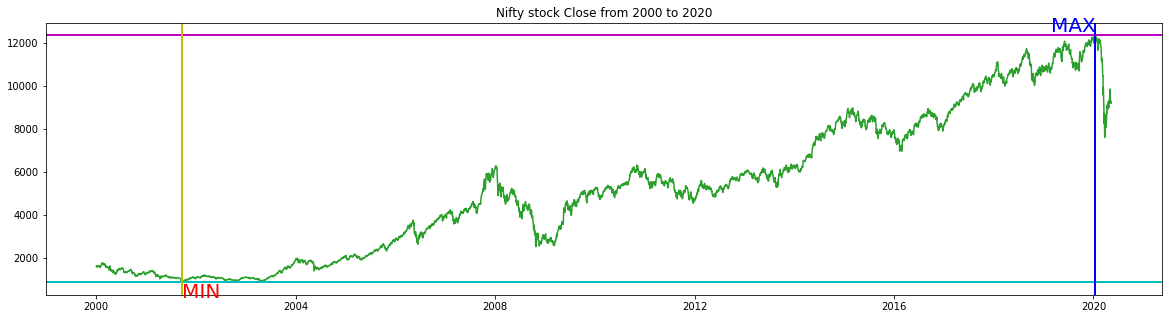

Max Value :   12362.3
Min Value :   854.2


In [7]:
plot_attribute(nifty_50_df,"Close",color='green')

## Nifty BANK Close Price Visulization

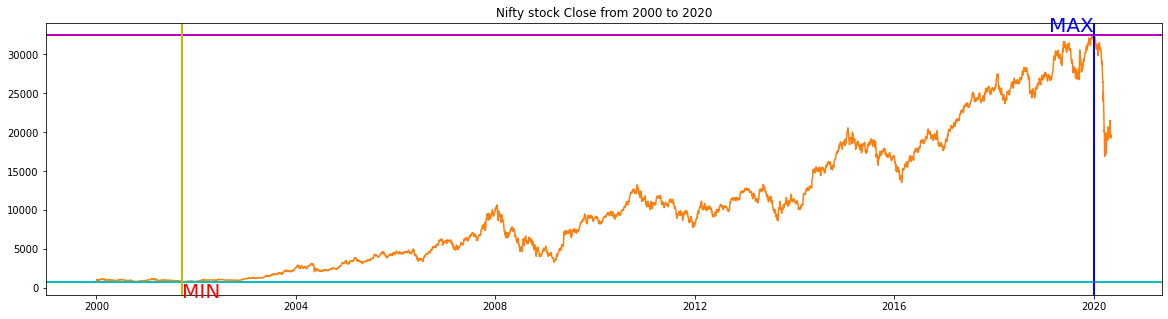

Max Value :   32443.85
Min Value :   743.7


In [8]:
plot_attribute(nifty_bank_df,"Close",color='orange')

## Comparing time series

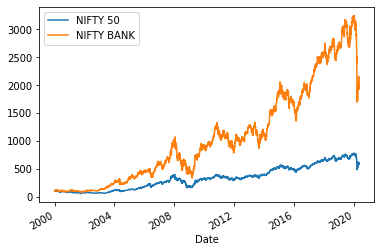

In [9]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_bank_df = nifty_bank_df["Close"].div(nifty_bank_df['Close'].iloc[0]).mul(100)
normalised_nifty_50_df.plot()
normalised_nifty_bank_df.plot()
plt.legend(['NIFTY 50','NIFTY BANK'])
plt.show()

## The augmented Dicky-Fuller test

In [10]:
dicky_fuller_result = adfuller(nifty_50_df['Close'])
dicky_fuller_result

(-0.7655677955763285,
 0.82902767044921,
 25,
 5035,
 {'1%': -3.4316494313795944,
  '10%': -2.5670756520148434,
  '5%': -2.8621142090353557},
 57330.470236984984)

## Showing Difference in plot

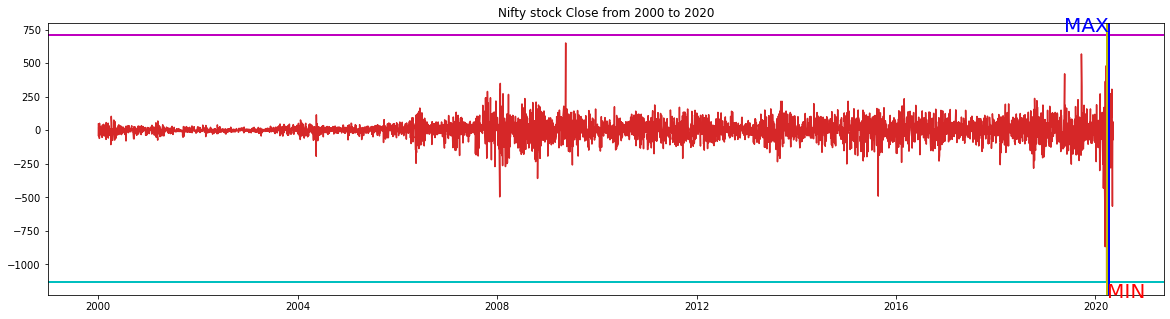

Max Value :   708.4000000000005
Min Value :   -1135.2000000000007


In [11]:
plot_attribute(nifty_50_df.diff(),"Close",color='red')

## proportional change

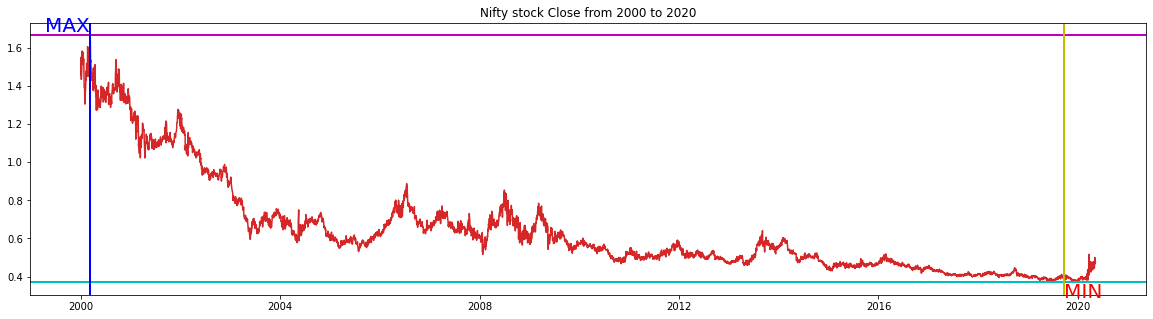

Max Value :   1.6664473417824028
Min Value :   0.3688453258828379


In [12]:
plot_attribute(nifty_50_df.shift(1)/nifty_bank_df,"Close",color='red')

## Hitogram plot

,count,mean,std,min,25%,50%,75%,max
Open,5061.0,5.216238e+03,3.274530e+03,8.530000e+02,1.983200e+03,5.096700e+03,7.895400e+03,1.243050e+04
High,5061.0,5.251467e+03,3.283746e+03,8.770000e+02,1.999700e+03,5.135550e+03,7.929100e+03,1.243050e+04
Low,5061.0,5.174455e+03,3.257304e+03,8.499500e+02,1.964650e+03,5.038850e+03,7.837700e+03,1.232140e+04
Close,5061.0,5.213434e+03,3.270074e+03,8.542000e+02,1.982750e+03,5.090850e+03,7.887800e+03,1.236230e+04
Volume,5061.0,1.665927e+08,1.423491e+08,1.394931e+06,7.772637e+07,1.370896e+08,1.983420e+08,1.811564e+09
Turnover,5061.0,6.832610e+10,5.500614e+10,4.012000e+08,3.018170e+10,5.794450e+10,8.494440e+10,5.970553e+11
P/E,5061.0,2.003701e+01,4.194021e+00,1.068000e+01,1.711000e+01,2.009000e+01,2.286000e+01,2.990000e+01
P/B,5061.0,3.547459e+00,7.992038e-01,1.920000e+00,3.030000e+00,3.470000e+00,3.790000e+00,6.550000e+00
Div Yield,5061.0,1.428164e+00,4.023796e-01,5.900000e-01,1.180000e+00,1.330000e+00,1.550000e+00,3.180000e+00


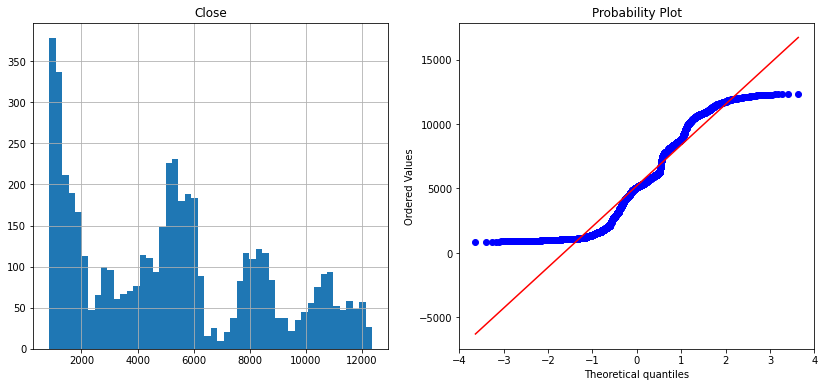

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
nifty_50_df['Close'].hist(bins=50)
plt.title('Close')
plt.subplot(1,2,2)
stats.probplot(nifty_50_df['Close'], plot=plt);
nifty_50_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3694.0,1.391552e+04,7.904747e+03,3.385400e+03,7.550413e+03,1.125467e+04,1.895529e+04,3.248660e+04
High,3694.0,1.403268e+04,7.935635e+03,3.446750e+03,7.657412e+03,1.137767e+04,1.907105e+04,3.261310e+04
Low,3694.0,1.377913e+04,7.858354e+03,3.314550e+03,7.418462e+03,1.115250e+04,1.875723e+04,3.224850e+04
Close,5062.0,1.059300e+04,8.678902e+03,7.437000e+02,3.271895e+03,9.173650e+03,1.668424e+04,3.244385e+04
Volume,4139.0,6.556636e+07,1.052494e+08,3.763050e+05,1.498970e+07,2.568816e+07,6.832820e+07,1.568143e+09
Turnover,4139.0,2.128542e+10,2.083387e+10,2.578000e+08,8.274000e+09,1.607900e+10,2.506470e+10,2.445116e+11
P/E,5061.0,1.787367e+01,1.259850e+01,4.540000e+00,9.840000e+00,1.449000e+01,1.938000e+01,6.908000e+01
P/B,5061.0,2.198267e+00,7.429948e-01,7.700000e-01,1.670000e+00,2.310000e+00,2.690000e+00,4.950000e+00
Div Yield,5061.0,1.544843e+00,8.979761e-01,1.600000e-01,9.800000e-01,1.300000e+00,2.070000e+00,4.850000e+00


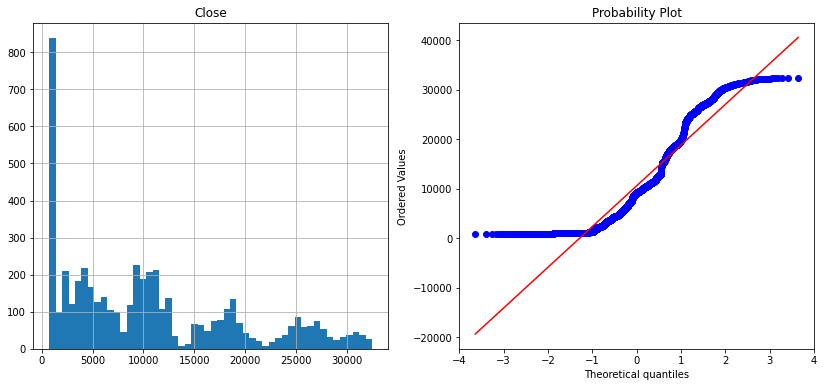

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
nifty_bank_df['Close'].hist(bins=50)
plt.title('Close')
plt.subplot(1,2,2)
stats.probplot(nifty_bank_df['Close'], plot=plt);
nifty_bank_df.describe().T

##Autocorrelation and Partial Autocorrelation

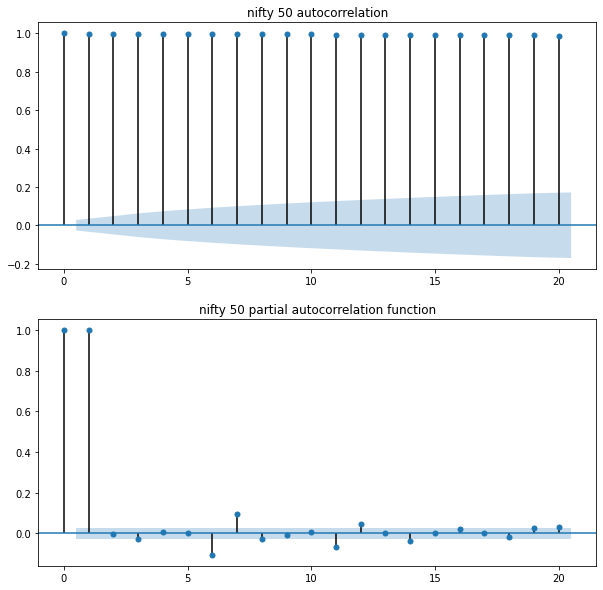

In [15]:
plt.figure(figsize=(10,10))

# ACF of Nifty 50 close price
ax1 = plt.subplot(211)
plot_acf(nifty_50_df["Close"], lags="20",title="nifty 50 autocorrelation",ax=ax1)

# PACF of Nifty 50 close price
ax2 = plt.subplot(212)
plot_pacf(nifty_50_df["Close"], lags="20",title="nifty 50 partial autocorrelation function",ax=ax2)

plt.show()

## Splitting  the data into train and test data

In [16]:
train_data = nifty_50_df["Close"]["2018":"4-15-2020"]
test_data =  nifty_50_df["Close"]["4-15-2020":]

## SARIMAX Model

In [17]:
model = SARIMAX(train_data, order=(5,1,2)) 
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [18]:
mars = np.mean(np.abs(results.resid))
print(mars)

102.14464691405841


## Prediction on train data

In [19]:
prediction = results.get_prediction(start="7-2019")

In [20]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

## Forcasting on test data

In [21]:
forecast = results.get_forecast(steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [22]:
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

## Plot Prediction and Forcasting

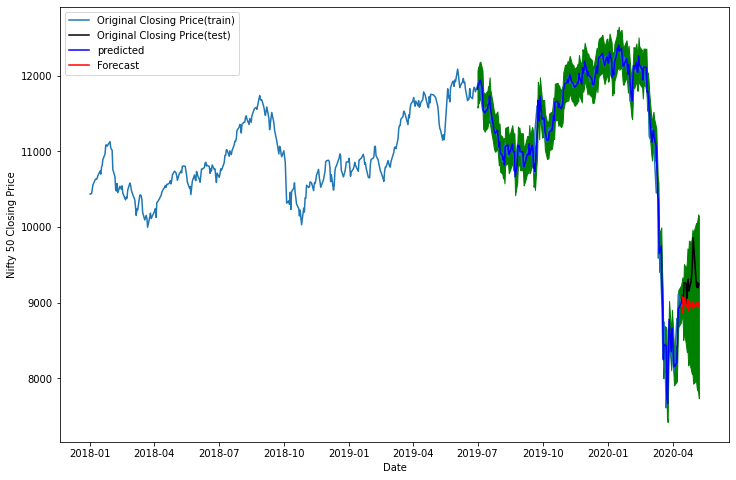

In [23]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='b', label='predicted')
plt.plot(test_data.index, mean_forecast, color='r', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='green')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

# LSTM MODEL

In [24]:
import keras
import keras.backend as K
K.clear_session()
from sklearn.preprocessing import MinMaxScaler

##  Preprocessing

In [25]:
X = nifty_50_df.drop(["Close","Turnover","P/E","P/B","Div Yield"],axis=1)
y = nifty_50_df["Close"]

# Preprocessing
scaler = MinMaxScaler()
scaler_X = scaler.fit_transform(X)

X_df = pd.DataFrame(data=scaler_X, columns=["Open","High","Low","Volume"],index= X.index)
y_df = pd.DataFrame(data=y, columns=["Close"],index= y.index)

train_X_df = X_df["2000":"1-2-2020"]
test_X_df = X_df["1-2-2020":]

train_y_df = y_df["2000":"1-2-2020"]
test_y_df = y_df["1-2-2020":]

train_X = np.array(train_X_df)
test_X = np.array(test_X_df)

train_y = np.array(train_y_df)
test_y = np.array(test_y_df)

train_X = np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))
test_X = np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

train_y = np.reshape(train_y,(train_y.shape[0],1))
test_y = np.reshape(test_y,(test_y.shape[0],1))

In [26]:
print("Train X shape : ", train_X.shape)
print("Test X shape : ", test_X.shape)

print("Train y shape : ", train_y.shape)
print("Test y shape : ", test_y.shape)

Train X shape :  (4976, 4, 1)
Test X shape :  (86, 4, 1)
Train y shape :  (4976, 1)
Test y shape :  (86, 1)


## LSTM Model

In [27]:
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.LSTM(128,
                                 input_shape=(train_X.shape[1],1),
                                 activation='relu',
                                 return_sequences=True
                                ))

lstm_model.add(keras.layers.LSTM(64,return_sequences=False,activation='relu'))

lstm_model.add(keras.layers.Dense(32,activation='relu'))
lstm_model.add(keras.layers.Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')

## Model Training

In [28]:
history = lstm_model.fit(train_X, train_y, batch_size=128,epochs=100, verbose=1, shuffle=False)

Epoch 1/100
39/39 [==============================] - 3s 16ms/step - loss: 36529372.0000
Epoch 2/100
39/39 [==============================] - 1s 16ms/step - loss: 28380038.0000
Epoch 3/100
39/39 [==============================] - 1s 15ms/step - loss: 95349.1719
Epoch 4/100
39/39 [==============================] - 1s 16ms/step - loss: 1021698.7500
Epoch 5/100
39/39 [==============================] - 1s 15ms/step - loss: 1019278.6875
Epoch 6/100
39/39 [==============================] - 1s 15ms/step - loss: 1059312.1250
Epoch 7/100
39/39 [==============================] - 1s 16ms/step - loss: 1096195.2500
Epoch 8/100
39/39 [==============================] - 1s 15ms/step - loss: 1127844.8750
Epoch 9/100
39/39 [==============================] - 1s 15ms/step - loss: 1147546.7500
Epoch 10/100
39/39 [==============================] - 1s 15ms/step - loss: 1159904.2500
Epoch 11/100
39/39 [==============================] - 1s 15ms/step - loss: 1156442.1250
Epoch 12/100
39/39 [=====================

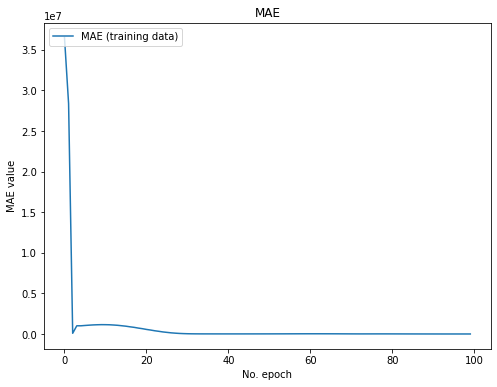

In [29]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='MAE (training data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## Model Prediction

In [30]:
prediction = lstm_model.predict(test_X)

## RMS Error of model

In [31]:
np.sqrt(np.mean(((prediction - test_y) ** 2)))

307.68174696492815

## Plot Prediction

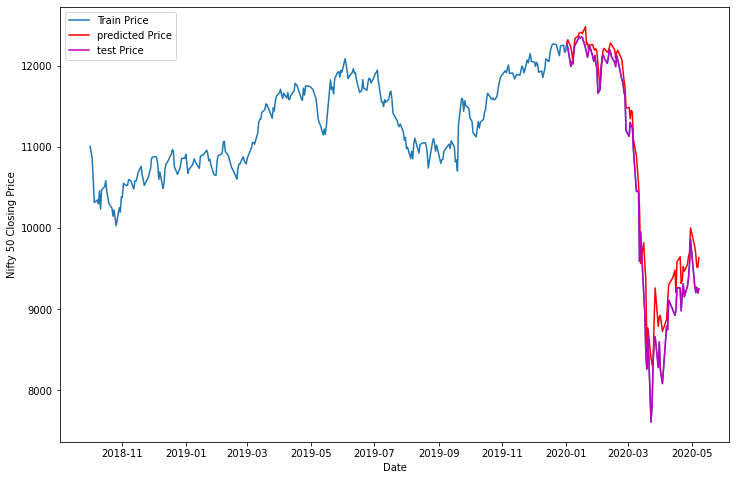

In [32]:
test_y_df["prediction"] = np.reshape(prediction,(prediction.shape[0]))

plt.figure(figsize=(12,8))

plt.plot(nifty_50_df["10-2018":].index,nifty_50_df["10-2018":]["Close"], label="Train Price")
plt.plot(test_y_df.index,test_y_df.prediction, label="predicted Price",color='r')
plt.plot(test_y_df.index,test_y_df.Close, label="test Price",color='m')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()